In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl



from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import pathlib
import os
import sys

In [6]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Online_Shopping', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2']


In [7]:
datapath = get_data_path("Online_Shopping", "e_shop_clothing_2008.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Online_Shopping/e_shop_clothing_2008.csv')

In [9]:
df_raw = pd.read_csv(datapath,sep = ";")

df_raw

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [13]:
df_raw["page 2 (clothing model)"].unique()

array(['A13', 'A16', 'B4', 'B17', 'B8', 'C56', 'C57', 'P67', 'P82', 'B31',
       'B21', 'B24', 'B27', 'A10', 'P1', 'P34', 'P33', 'C4', 'C7', 'C10',
       'C17', 'P77', 'A34', 'A37', 'C25', 'C21', 'C15', 'C53', 'B26',
       'A11', 'C5', 'P60', 'P56', 'P55', 'P48', 'P50', 'P42', 'P23',
       'C49', 'B23', 'C19', 'C34', 'C40', 'C50', 'C42', 'A18', 'A1', 'B1',
       'B16', 'A3', 'B3', 'B30', 'P16', 'A2', 'A5', 'A41', 'B2', 'B13',
       'B15', 'B9', 'B20', 'B25', 'B33', 'B34', 'C2', 'C33', 'C35', 'C55',
       'C59', 'P61', 'P62', 'A6', 'C47', 'B32', 'A17', 'A7', 'A8', 'A9',
       'A20', 'A32', 'C11', 'C22', 'P12', 'A4', 'A23', 'B12', 'B10',
       'C14', 'A12', 'A31', 'A15', 'B7', 'C8', 'C18', 'P2', 'P10', 'C26',
       'C31', 'A35', 'A36', 'C46', 'P29', 'A21', 'P63', 'P30', 'P32',
       'P66', 'P57', 'P43', 'P4', 'A28', 'B28', 'P15', 'A19', 'B19',
       'B14', 'B6', 'A29', 'P49', 'C3', 'C9', 'C36', 'C37', 'C39', 'C51',
       'C52', 'A42', 'B29', 'B11', 'P6', 'P17', 'P11', 'C1', 

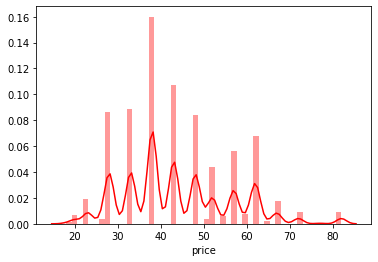

In [15]:
sns.distplot(df_raw["price"], color="red")